<a href="https://colab.research.google.com/github/STRMNGnwo/Masters-Thesis/blob/main/Srinivas_Masters_Thesis_TextBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs

In [ ]:
!pip install -q --upgrade keras-cv
!pip install nltk

#used to perform semantic similarity analysis after evolutionary operators are used (to make sure they make sense)
!pip install sentence_transformers
!pip install language_tool_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-man

# Imports/ Downloads

In [ ]:
#fundamental imports
import os
import sys
import random
import torch
import nltk

In [ ]:
#downloads that are necessary for the NLP based mutation and cross-over to occur

nltk.download('punkt')

#used to perform pos tagging (used to only mutate adjectives, verbs and nouns in mutation-synonym based and also contextual )
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

#used to obtain synonyms during mutation
nltk.download('words')
nltk.download('wordnet')

#used to ignore/remove stopwords during mutation
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
from google.colab import drive


drive.mount("/content/drive/")
sys.path.insert(0, '/content/drive/MyDrive/Masters-Thesis-Datasets/')

Mounted at /content/drive/


# Checking if GPU is available (and asking Colab to use it if it is)

In [ ]:
if torch.cuda.is_available():
  DEVICE=torch.device("cuda")
  torch.cuda.get_device_name(0)
  print("GPU")

else:
  DEVICE="cpu"
  print("CPU")

GPU


# Importing and initialising a text to image stable diffusion model

In [ ]:
import time
import keras_cv
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [ ]:
model = keras_cv.models.StableDiffusion(
    img_width=256, img_height=256, jit_compile=False
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


# Function to plot images

In [ ]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

# Importing a text file containing some prompts

Also importing some reference (ground truth) images that the prompts should ideally generate

In [ ]:
!unzip /content/drive/MyDrive/Masters-Thesis-Datasets/VanGogh.zip

Archive:  /content/drive/MyDrive/Masters-Thesis-Datasets/VanGogh.zip
  inflating: VanGoghPaintings.csv    
  inflating: VincentVanGogh/Arles/A Field of Yellow Flowers.jpg  
  inflating: VincentVanGogh/Arles/A L Arlesienne Madame Ginoux with Gloves and Umbre.jpg  
  inflating: VincentVanGogh/Arles/A Lane in the Public Garden at Arles.jpg  
  inflating: VincentVanGogh/Arles/A Lane near Arles.jpg  
  inflating: VincentVanGogh/Arles/A Pair of Leather Clogs.jpg  
  inflating: VincentVanGogh/Arles/A Pair of Shoes.jpg  
  inflating: VincentVanGogh/Arles/A Pork-Butcher s Shop Seen from a Window.jpg  
  inflating: VincentVanGogh/Arles/Almond Tree in Blossom.jpg  
  inflating: VincentVanGogh/Arles/Apricot Trees in Blossom 2.jpg  
  inflating: VincentVanGogh/Arles/Apricot Trees in Blossom.jpg  
  inflating: VincentVanGogh/Arles/Arles View from the Wheat Fields.jpg  
  inflating: VincentVanGogh/Arles/Avenue of Plane Trees near Arles Station.jpg  
  inflating: VincentVanGogh/Arles/Blossoming Almond

# Evolutionary Computing Aspects

### Model Trial

In [ ]:
# trial generation of an image from initial population
from PIL import Image
reference_image_path="/content/VincentVanGogh/Watercolors/Fishing Boats on the Beach.jpg"

reference_image= Image.open(reference_image_path)

trial_prompt_1="Four colorful boats are on a beach next to the ocean."
trial_prompt_2="Vibrant boats rest on an orange beach under a vivid blue sky, their bold colors creating a striking contrast with the natural surroundings."

50/50 [==============================] - 113s 1s/step


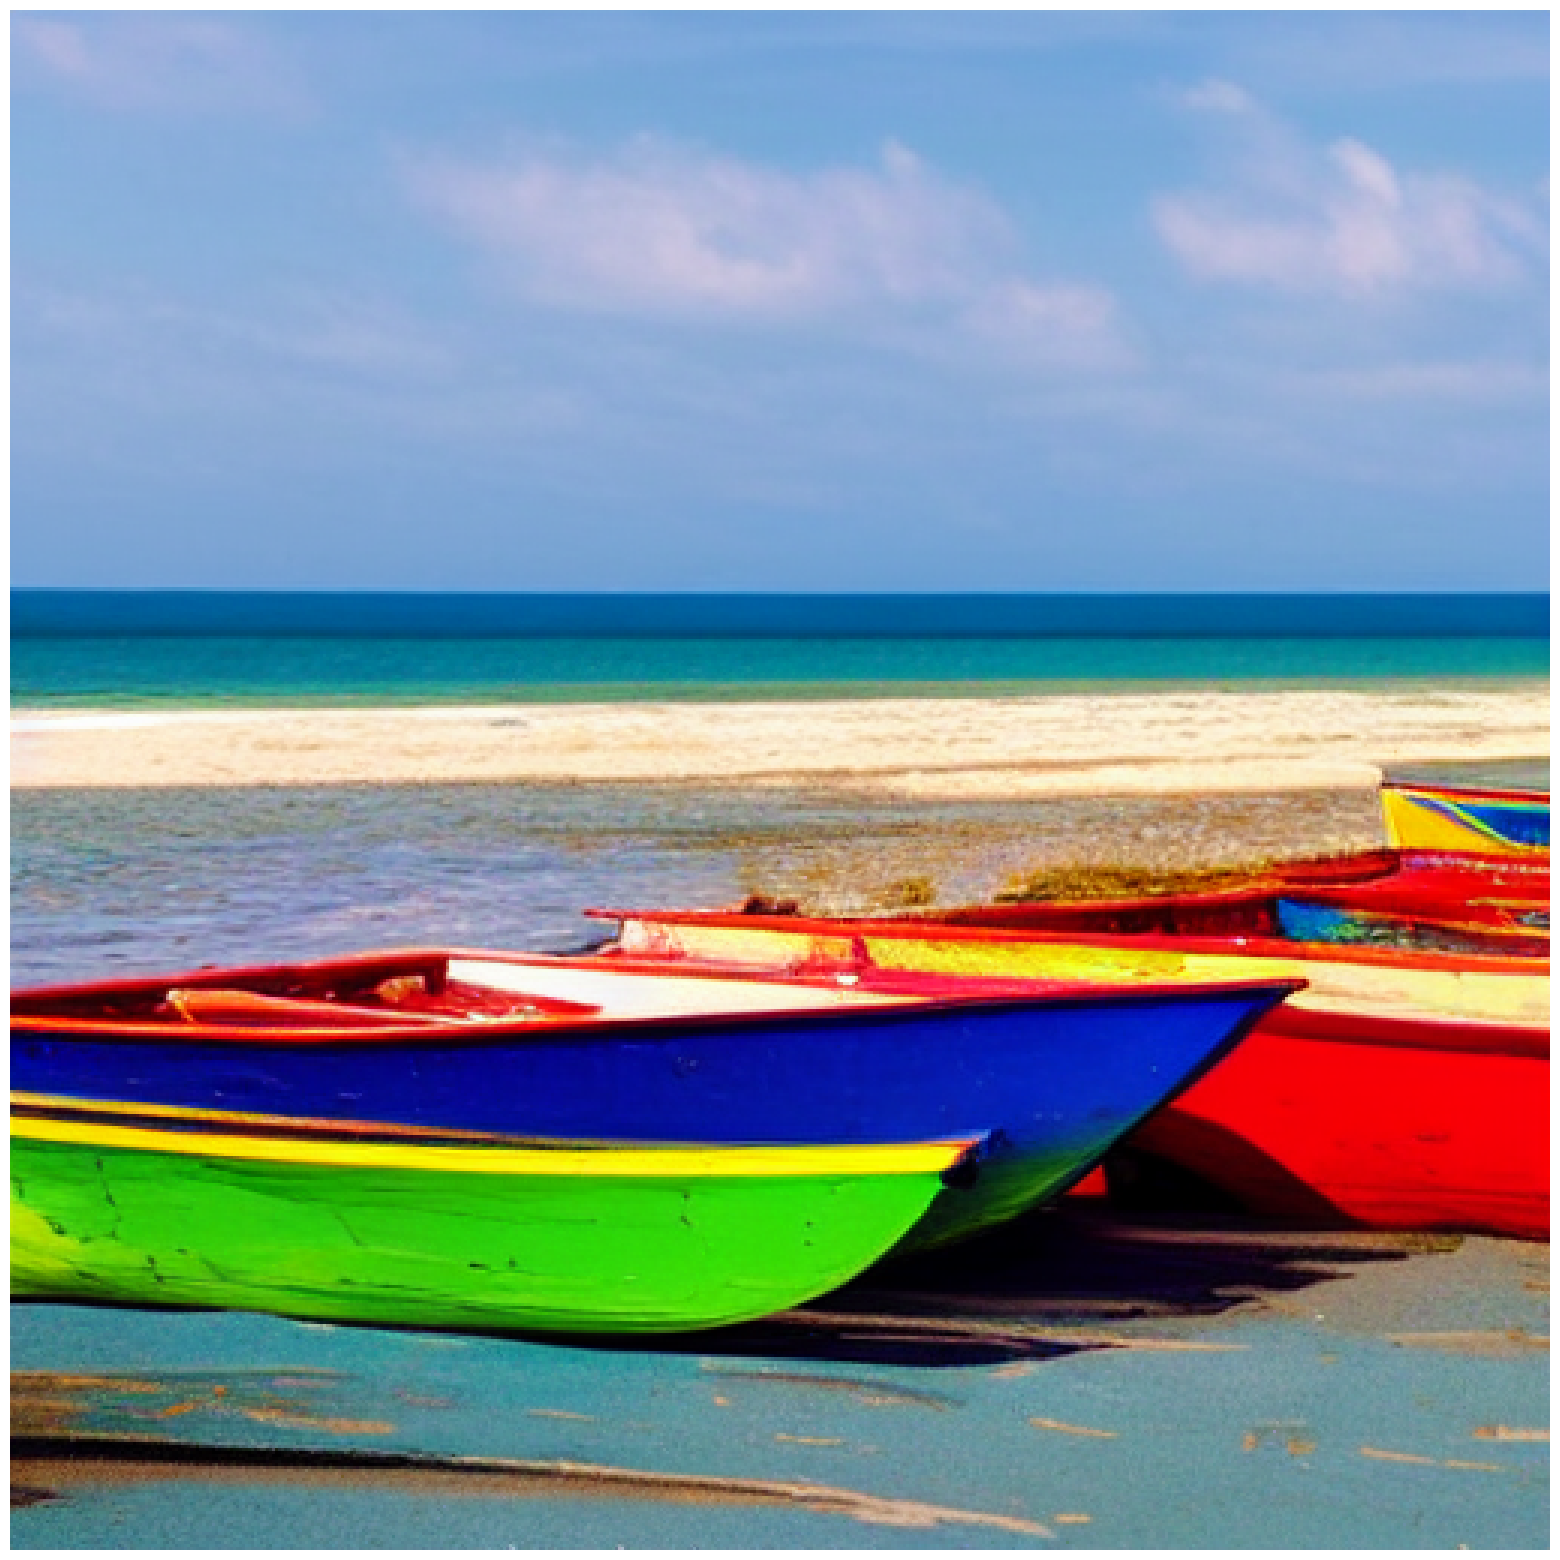

In [ ]:
image_1 = model.text_to_image(trial_prompt_1, batch_size=1)
plot_images(image_1)

50/50 [==============================] - 55s 1s/step


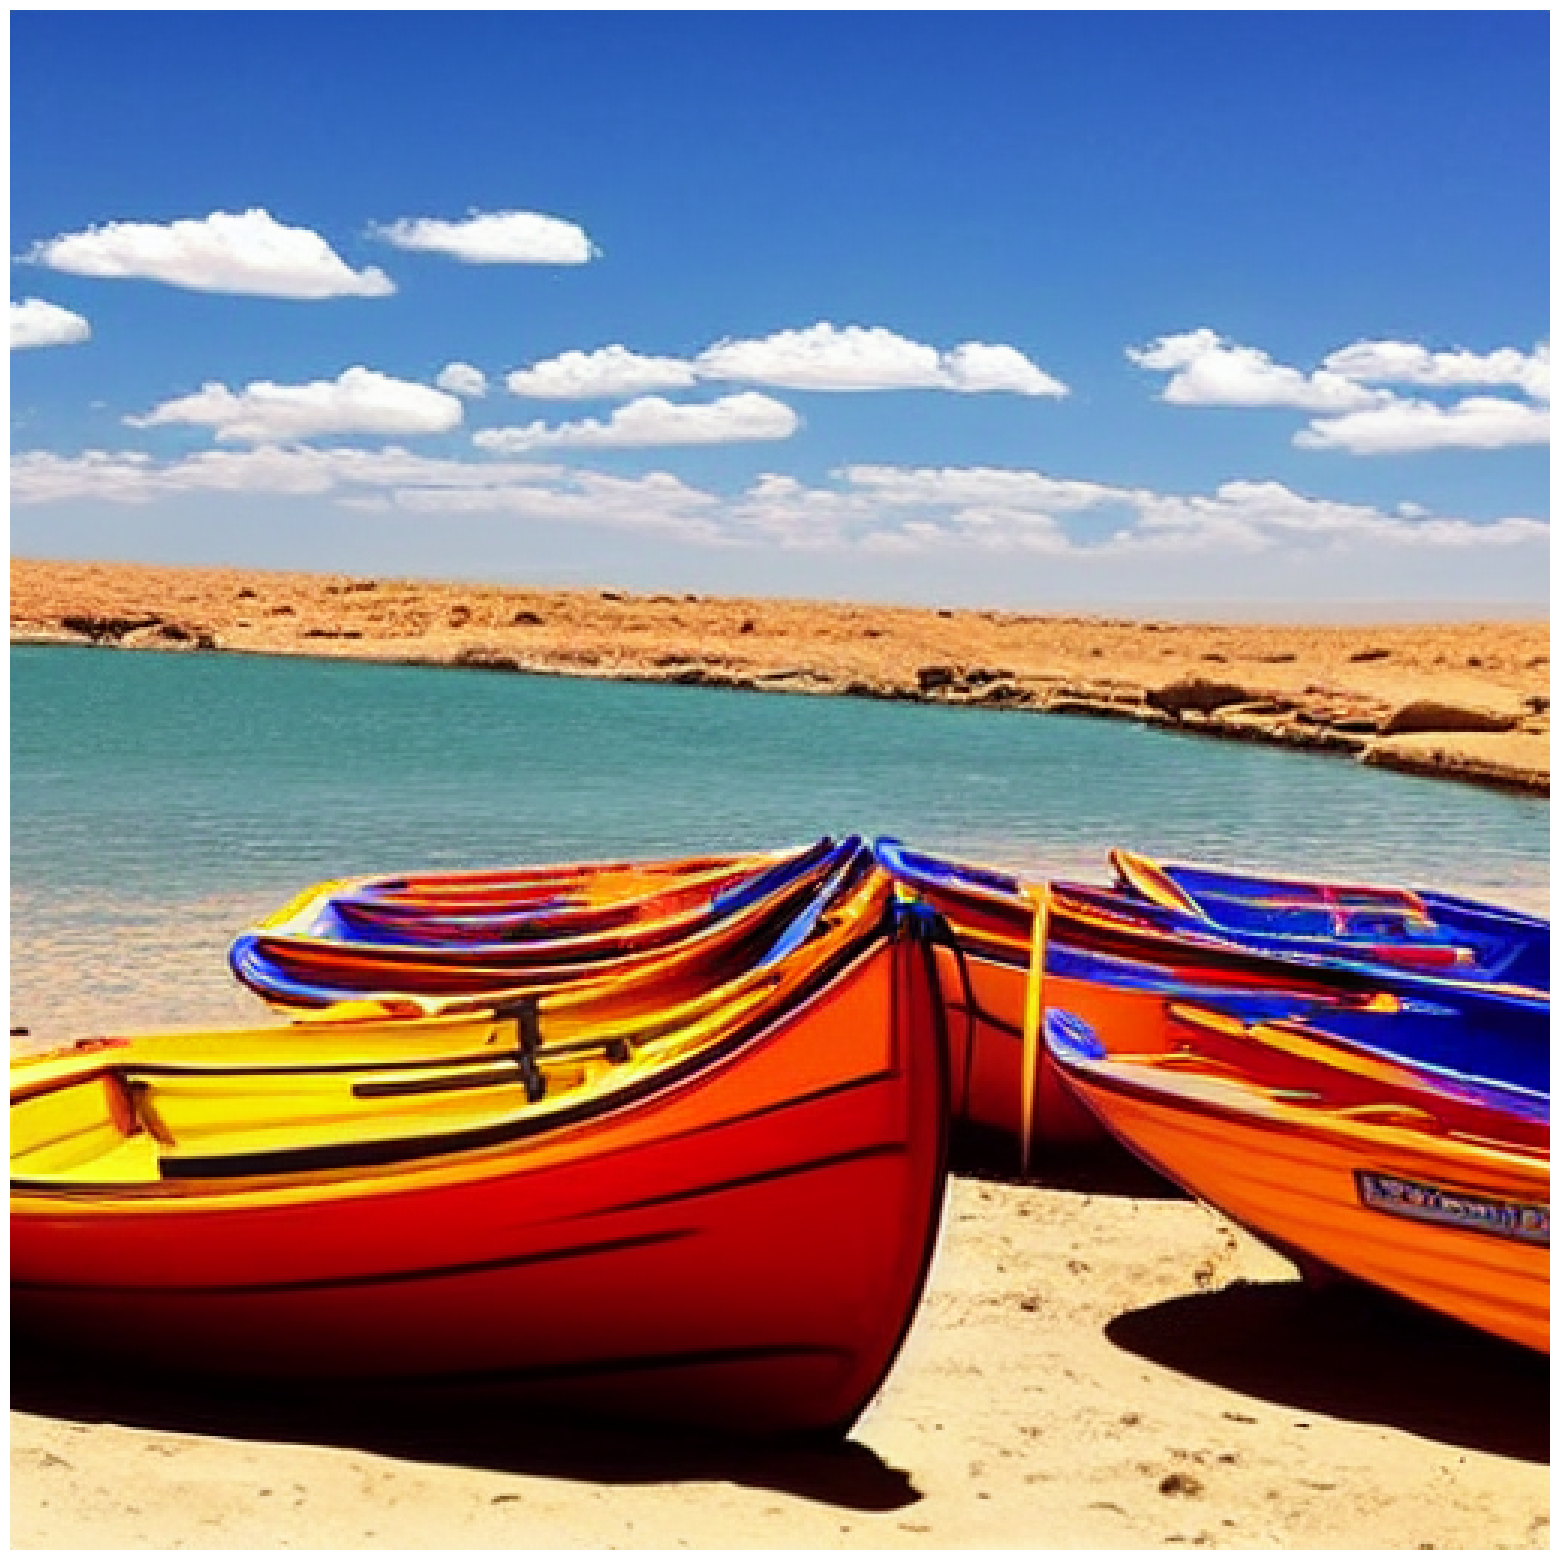

In [ ]:
image_2 = model.text_to_image("'Vibrant boats rest on an Orange_River beach under a vivid blue sky , their bold colors creating a collide_with contrast with the instinctive surroundings .'", batch_size=1)
plot_images(image_2)

### Helper function to generate images for a prompt

In [ ]:
def generate_image(individual):
  generated_image=model.text_to_image(individual["prompt"], batch_size=1)
  return generated_image

### NLP helper functions to aid mutation and cross-over

In [ ]:
from nltk.corpus import wordnet,stopwords
from nltk import pos_tag, word_tokenize
from nltk.chunk import ne_chunk
import random
from sentence_transformers import SentenceTransformer, util
import language_tool_python

vocab = [''' LLM extract descriptive words/ features from a provided image'''] #can be used as an additional mutation function


stop_words = set(stopwords.words('english'))

#used to check if sentance after mutation and cross-over is grammatically correct and semantically similar
tool = language_tool_python.LanguageTool('en-US')
transformer_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
def is_sentence_semantically_similar(original_sentence, mutated_sentence, threshold=0.7):
    embeddings = transformer_model.encode([original_sentence, mutated_sentence])
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()
    #print("Similarity is: "+str(similarity))
    return similarity >= threshold

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    synonyms.discard(word)
    return list(synonyms)

def extract_phrases(sentence):
    words = word_tokenize(sentence)
    tagged = pos_tag(words)
    chunks = ne_chunk(tagged)
    phrases = []
    current_phrase = []
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            current_phrase.append(' '.join(c[0] for c in chunk))
        else:
            if current_phrase:
                phrases.append(' '.join(current_phrase))
                current_phrase = []
            phrases.append(chunk[0])
    if current_phrase:
        phrases.append(' '.join(current_phrase))
    return phrases


sentence = "The quick brown fox jumps over the lazy dog near the Eiffel Tower."
phrases = extract_phrases(sentence)
print(phrases)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'near', 'the', 'Eiffel Tower', '.']


### Defining the fitness function

In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

reference_image_resized = reference_image.resize((256, 256))
reference_image_pil=reference_image_resized
reference_image_np=np.asarray(reference_image_pil)

def fitness_function(individual):

  #basic score-> compare similarity between generated image and reference image
  #similarity determined by Structural Similarity Index which considers changes in structural information, luminance, and contrast
  # ssim value ranges from -1 to 1

  #removing the batch dimension from generated image (diffusion model outputs 4 dim batch-first, channel-last image)
  g_image=individual["image"]
  gen_image=g_image[0]
  ssim_index, _ = ssim(gen_image, reference_image_np, full=True,win_size=7, channel_axis=2)
  #print(f'SSIM: {ssim_index}')

  return ssim_index


In [ ]:
#function that loops through population and evaluates/assigns fitness for each individual
def evaluate_population_fitness(population):

  fitness_population=population
  for index,individual in enumerate(fitness_population):
    individual["fitness"]=fitness_function(individual)

  return fitness_population

In [ ]:
# testing out ssim
image_1_without_channel=image_1[0]
ssim_index1, _ = ssim(image_1_without_channel, reference_image_np, full=True, win_size=7, channel_axis=2)
print("Fitness of generated image 1, relative to actual image: ", ssim_index1)

image_2_without_channel=image_2[0]

ssim_index2, _ = ssim(image_2_without_channel, reference_image_np, full=True,win_size=7,channel_axis=2)
print("Fitness of generated image 2, relative to actual image: ",ssim_index2)

Fitness of generated image 1, relative to actual image:  0.2059138730712383
Fitness of generated image 2, relative to actual image:  0.17696698366144614


### Defining the mutation function

In [ ]:
import random as rd
# The MUTATION operator

def synonym_mutate(individual, mutation_rate=0.3):
    sentence=individual["prompt"]
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    for i in range(len(words)):
        word, pos = pos_tags[i]
        if word.lower() not in stop_words and pos in  ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:  # Adjectives, Verbs and Nouns
            if random.random() < mutation_rate:
                synonyms = get_synonyms(word)
                if synonyms:
                    words[i] = random.choice(synonyms)
    #only return the mutated sentence if it is semantically similar to version pre-mutation (could help avoid boat becoming gravy holder and stuff like that )
    if is_sentence_semantically_similar(sentence,' '.join(words)):
      #print(' '.join(words)+" is similar to "+ sentence)
      return ' '.join(words)

    return sentence

# Contextual mutation can be used in later stages of the experimentation process, its not ready yet.

#TO DO: Vocabulary should be all words in the initial population of prompts (should I update vocabulary after every generation?).
# OR should Vocabulary be obtained by providing an image to a multi-modal LLM and ask it to provide a list of adjectives that can describe the image (artistic, painting, watercolour and stuff like that).
# Also for the replace bit-> should POS tag all words in prompt being mutated, POS tag vocabulary and then replace noun with noun, verb with verb etcetera.
def contextual_mutation(individual, vocab, mutation_rate=0.3):
    sentence=individual["prompt"]
    words = word_tokenize(sentence)
    for i in range(len(words)):
        if random.random() < mutation_rate:
            #action = random.choice(['replace', 'add', 'remove'])
            action="replace"
            if action == 'replace':
                words[i] = random.choice(vocab)
            elif action == 'add':
                words.insert(i, random.choice(vocab))
            elif action == 'remove' and len(words) > 1:
                words.pop(i)
    return ' '.join(words)

# trialling out both the synonym and context based mutations
sentence = "Vibrant boats rest on an orange beach under a vivid blue sky, their bold colors creating a striking contrast with the natural surroundings."

i1={"prompt":sentence}
mutated_sentence1 = synonym_mutate(i1)
mutated_sentence2 = contextual_mutation(i1, vocab)
print(f'Mutated Sentence 1 [Synonym based]: {mutated_sentence1}')
#print(f'Mutated Sentence 2 [Contextual]: {mutated_sentence2}')


Similarity is: 0.9347051978111267
Mutated Sentence 1 [Synonym based]: Vibrant boats rest on an orange beach under a vivid blue toss , their bold colors creating a striking contrast with the cancel surroundings .
Mutated Sentence 2 [Contextual]: calm boats a on an orange beach under a and sea sky , sunset bold colors sea a flying contrast with the natural surroundings .


In [ ]:
def mutate_population(population,mutation_rate):
  mutated_population=[]

  for individual in population:
    individual["prompt"]= synonym_mutate(individual,mutation_rate)
    mutated_population.append(individual)

  return mutated_population


### Defining the crossover function

In [ ]:
#phrase based crossover
def phrase_based_crossover(parent1, parent2):
    parent1_phrases = extract_phrases(parent1["prompt"])
    parent2_phrases = extract_phrases(parent2["prompt"])

    if len(parent1_phrases) > 1 and len(parent2_phrases) > 1:
        crossover_point1 = random.randint(1, len(parent1_phrases) - 1)
        crossover_point2 = random.randint(1, len(parent2_phrases) - 1)

        child1_phrases = parent1_phrases[:crossover_point1] + parent2_phrases[crossover_point2:]
        child2_phrases = parent2_phrases[:crossover_point2] + parent1_phrases[crossover_point1:]

        #TO DO: Check semantic similarity with parents?
        return ' '.join(child1_phrases), ' '.join(child2_phrases)
    else:
        return parent1, parent2

# TO DO: Phrase based crossover can be fixed length (first one is what we're doing and another one can be "adaptive" n-word number- as n grows larger, allow for more phrases to be crossed over )
trial_prompt_1="Four colorful boats are on a beach next to the ocean."
trial_prompt_2="Vibrant boats rest on an orange beach under a vivid blue sky, their bold colors creating a striking contrast with the natural surroundings."

parent1 = {"prompt":trial_prompt_1}
parent2 = {"prompt":trial_prompt_2}

#trialling out the phrase based cross-over
child1, child2 = phrase_based_crossover(parent1, parent2)
print(f'Child 1: {child1}')
print(f'Child 2: {child2}')


Child 1: Four colorful boats are on a beach creating a striking contrast with the natural surroundings .
Child 2: Vibrant boats rest on an orange beach under a vivid blue sky , their bold colors next to the ocean .


In [ ]:
# The CROSSOVER operator -generates kids until population size is back to normal (after selection process)
def crossover_population(population,num_parents=2,POP_SIZE=20):

  needed_kids=POP_SIZE-len(population)
  print(f"Crossover needs to create {needed_kids} new samples")
  children=[]

  while len(children)<needed_kids:
    #choosing 2 parents from the population
    parent1,parent2=rd.sample(population,2)
    child1prompt,child2prompt=phrase_based_crossover(parent1,parent2)

    if len(children) < needed_kids:
        child1 = {
            "prompt": child1prompt,
            "image": None,
            "fitness": -1000
        }

        children.append(child1)

    if len(children) < needed_kids:
        child2 = {
            "prompt": child2prompt,
            "image": None,
            "fitness": -1000
        }

        children.append(child2)


  return children

### Tournament Selection

In [ ]:
#fight function and tournament selection function
def fight(fight_participants):
  currWinner = fight_participants[0]
    #loop through participants and identify individual with highest fitness
  for i in range(1, len(fight_participants)):
      if fight_participants[i]["fitness"] > currWinner["fitness"]:
          currWinner = fight_participants[i]
  return currWinner

# Tournament selection function should return winners of the tournament
def tournament_selection(population, tournament_size,reference_image=reference_image):
    strongest_individuals=[]

    #making sure every text prompt is involved in the fight
    num_rounds=round(len(population)/tournament_size)
    for i in range(0, num_rounds):

        #giving some prompts a pass or a by if a fight doesn't have enough participants
        if (len(population)<tournament_size):
            for p in population:
                strongest_individuals.append(p)
            return strongest_individuals


        #randomly choosing tournament_size fighters to fight
        individuals_to_fight=rd.sample(population,tournament_size)

        #getting the winner of the fight and adding him to winners list
        strongest_individuals.append(fight(individuals_to_fight))

        #remove combatants from population (a prompt that has already "fought" won't fight again)
        for fighter in individuals_to_fight:
            population.remove(fighter)

    return strongest_individuals


### Defining the basic parameters of the Genetic Algorithm's evolutionary loop

In [ ]:
TOTAL_GENERATIONS=20
TOURNAMENT_SIZE=2
NUM_PARENTS=2
MUTATION_RATE=0.1
POP_SIZE=20

### Initialising the population of prompts and the image they should ideally generate

In [ ]:
def read_prompts_from_file(file_path,pop_size):
    with open(file_path, 'r') as file:
        prompts = [line.strip() for line in file if line.strip()]

    prompts_list=[]

    for idx,prompt in enumerate(prompts):
      if idx==pop_size:
        break
      print(f"prompt {idx}: "+ prompt)
      prompts_list.append(prompt.strip())

    return prompts_list

In [ ]:
#initially population initialisation can be just reading in the text file of pre-defined prompts
def initialise_population(pop_size):
  print("Initialising population")
  #population is going to be a list of dict objects
  # population=[individual1:{"prompt":"a description of the image","fitness":fitness score, "image":generatedimage}, individual2]
  initial_population=[]

  print("Reading in prompts")
  # Reading in the prompts from text file (these will make up the initial population)
  prompts = read_prompts_from_file("/content/CaptionsMastersThesis-D1.txt",pop_size)

  print(f" Read in {len(prompts)} prompts")
  print("Creating representations")
  #initially setting fitness to a very low value for every prompt/text description
  for prompt in prompts:
    individual={}
    individual["prompt"]=prompt
    individual["image"]=generate_image(individual)
    individual["fitness"]=-1000

    initial_population.append(individual)

  return initial_population


### Running the loop

In [ ]:
def print_top_individuals(population, top_n=5):
    # Sort the population by fitness in descending order
    sorted_population = sorted(population, key=lambda x: x["fitness"], reverse=True)
    top_individuals = sorted_population[:top_n]
    print(f"Top {top_n} individuals:")
    for idx, individual in enumerate(top_individuals):
        print(f"Rank {idx+1}: Fitness = {individual['fitness']}, Prompt = {individual['prompt']}")

In [ ]:
initial_population=initialise_population(6)

#initialise population should take care of initial image generation for each prompt.
#Fitness still needs to be calculated

Initialising population
Reading in prompts
prompt 0: 1.Four colorful boats are on a beach next to the ocean.
prompt 1: 2.A painting shows four brightly colored boats with red, green, and blue hues on a sandy beach, with the blue sea in the background.
prompt 2: 3.Vibrant boats rest on an orange beach under a vivid blue sky, their bold colors creating a striking contrast with the natural surroundings.
prompt 3: 4.Boats are parked on the sand, and the water is blue. The boats have lots of colors like red and green.
prompt 4: 5.This image features four small, traditional fishing boats on a bright orange beach. Each boat is uniquely painted, with swirling patterns and vivid colors. The deep blue sea stretches out in the background, meeting a sky of the same hue.
prompt 5: 6.On a golden beach, where the azure sea kisses the shore, rest boats of red, green, and blue, their masts casting shadows as if painting dreams on the sand.
 Read in 6 prompts
Creating representations
50/50 [============

In [ ]:
import copy
population = copy.deepcopy(initial_population)

#Evolutionary loop
TOTAL_GENERATIONS=5
for generation in range(TOTAL_GENERATIONS):

  #evaluate fitness of entire population
  population=evaluate_population_fitness(population)
  print(f"---------------------------------------Generation {generation}---------------------------------------")
  print_top_individuals(population, top_n=3)

  # TO DO: have an elitism toggle to save a % high fitness individuals every generation to guarantee they make it to the next generation
  #tournament selection
  print("\nTOURNAMENT SELECTION:")
  print("Performing tournament selection on the population")
  print("Number of prompts in population: ",len(population))
  winners=tournament_selection(population=population,tournament_size=TOURNAMENT_SIZE)
  population=winners

  print("Number of prompts in population (After tournament): ",len(population))

  #crossover between winners to generate children which are then added to the population
  print("\nCROSSOVER PHASE:")
  print("Performing Cross-over on the population")
  crossed_over_children=crossover_population(population,NUM_PARENTS,POP_SIZE=len(initial_population)) #giving the function the population and the number of parents involved in a crossover
  population.extend(crossed_over_children)
  print("Number of prompts in population (After crossover): ",len(population))
  print("Cross-over phase completed")

  #mutation
  print("\nMUTATION PHASE:")
  print("Mutating population")
  population=mutate_population(population=population,mutation_rate=MUTATION_RATE)
  print("Mutation phase completed")

  #generate "new" images for current individual prompts in population
  print("Generating images for prompts in population")
  for individual in population:
    individual["image"]=generate_image(individual)

  print(f"END OF GENERATION {generation}")

  #end of generation

#end of evolutionary loop


---------------------------------------Generation 0---------------------------------------
Top 3 individuals:
Rank 1: Fitness = 0.14601904298739488, Prompt = 1.Four colorful boats are on a beach next to the ocean.
Rank 2: Fitness = 0.11434674943909125, Prompt = 2.A painting shows four brightly colored boats with red, green, and blue hues on a sandy beach, with the blue sea in the background.
Rank 3: Fitness = 0.10207693585694033, Prompt = 6.On a golden beach, where the azure sea kisses the shore, rest boats of red, green, and blue, their masts casting shadows as if painting dreams on the sand.

TOURNAMENT SELECTION:
Performing tournament selection on the population
Number of prompts in population:  6
Number of prompts in population (After tournament):  3

CROSSOVER PHASE:
Performing Cross-over on the population
Crossover needs to create 3 new samples
Number of prompts in population (After crossover):  6
Cross-over phase completed

MUTATION PHASE:
Mutating population
Mutation phase comp

In [ ]:
population=evaluate_population_fitness(population)
print_top_individuals(population,6)

Top 6 individuals:
Rank 1: Fitness = 0.15924215936367958, Prompt = 1.Four colorful boats are on a beach next to the are on a beach next to the ocean .
Rank 2: Fitness = 0.15229949724363998, Prompt = 1.Four beach next to the ocean .
Rank 3: Fitness = 0.12031175283159556, Prompt = 1.Four discolor gravy_boat brightly colored sauceboat with next to the sea .
Rank 4: Fitness = 0.11580600634952944, Prompt = 1.Four discolor boat brightly colored gravy_boat with red , a beach future to the ocean .
Rank 5: Fitness = 0.09489258762350782, Prompt = 1.Four beach Bolshevik , a beach next to the ocean .
Rank 6: Fitness = 0.07889953077395216, Prompt = 1.Four beach next gravy_boat with red , a beach next to the ocean .


#Experimental stuff /Old code

### Mechanism for cross-over (phrase based is fine):

### If a better cross-over mechanism is found and implemented, it can happen x% of the time to direct the evolution.

### Mechanism to correct grammar after cross-over

### Mutation to add descriptive elements that were obtained initially (extra mutation)

### Mutation to remove a phrase randomly (Very low probability)

### To show "directed evolution"-> implement elitism.

Population of 10 individuals. Fitness is only done for image.

2 Fitness functions:

1-> CLIP based (comparing text to reference image in the embedding space) used initially.

2-> Image based fitness function (SSIM) (every 10 generations)